In [1]:
#importing the few important library
import pandas as pd
import numpy as np
import scipy

In [2]:
#importing the dataset
data=pd.read_csv("PacificWest-Customer-Campaign-data.csv",sep=",",header=0)

In [3]:
data.info()
data.shape
data.columns
data.head()
data.tail()
len(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer ID                      9134 non-null object
State                            9134 non-null object
Location Code                    9134 non-null object
Gender                           9134 non-null object
Marital Status                   9134 non-null object
Education                        9134 non-null object
Employment Status                9134 non-null object
Income (USD)                     9134 non-null float64
Effective To Date                9134 non-null object
Customer Lifetime Value (USD)    9134 non-null float64
Coverage                         9134 non-null object
Monthly Premium Auto (USD)       9134 non-null int64
Number of Policies               9134 non-null int64
Policy Type                      9134 non-null object
Policy                           9134 non-null object
Months Since Policy Inception    9134 non-null int64
Months Since Last Claim       

9134

In [22]:
data.describe()

,Income (USD),Customer Lifetime Value (USD),Monthly Premium Auto (USD),Number of Policies,Months Since Policy Inception,Months Since Last Claim,Number of Open Complaints,Total Claim Amount (USD)
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,37657.380009,8004.952157,93.219291,2.966170,48.064594,15.097000,0.384388,434.089665
std,30379.904734,6870.969019,34.407967,2.390182,27.905991,10.073257,0.910384,290.492785
min,0.000000,1898.000000,61.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3994.250000,68.000000,1.000000,24.000000,6.000000,0.000000,272.000000
50%,33889.500000,5780.000000,83.000000,2.000000,48.000000,14.000000,0.000000,384.000000
75%,62320.000000,8962.250000,109.000000,4.000000,71.000000,23.000000,0.000000,547.750000
max,99981.000000,83325.000000,298.000000,9.000000,99.000000,35.000000,5.000000,2893.000000


In [23]:
# make list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  8


,Income (USD),Customer Lifetime Value (USD),Monthly Premium Auto (USD),Number of Policies,Months Since Policy Inception,Months Since Last Claim,Number of Open Complaints,Total Claim Amount (USD)
0,56274.0,2764.0,69,1,5,32,0,385.0
1,0.0,6980.0,94,8,42,13,0,1131.0
2,48767.0,12887.0,108,2,38,18,0,566.0
3,0.0,7646.0,106,7,65,18,0,530.0
4,43836.0,2814.0,73,1,44,12,0,138.0


In [24]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  2


In [25]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars]
print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  6


In [26]:
# capture categorical variables in a list
cat_vars = [var for var in data.columns if data[var].dtypes == 'O' and var not in ['Customer ID','Effective To Date']]

print('Number of categorical variables: ', len(cat_vars))
cat_vars

Number of categorical variables:  14


['State',
 'Location Code',
 'Gender',
 'Marital Status',
 'Education',
 'Employment Status',
 'Coverage',
 'Policy Type',
 'Policy',
 'Sales Channel',
 'Renew Offer Type',
 'Vehicle Class',
 'Vehicle Size',
 'Response']

# Bi-Variate Parametric Statistical Significance Test

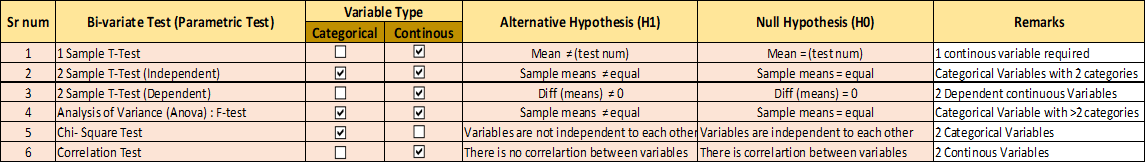

In [10]:
from scipy.stats import ttest_1samp 
from scipy import stats

In [37]:
#1 Sample Ttest
tset, pval = ttest_1samp(data['Months Since Policy Inception'],50)
print('Pvalue',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("Since P value is <0.05 so result is statistically significant and hence rejecting null hypothesis of mean of month policy =50")
else:
  print('Result is statistically Insignificant hence we can not reject null hypothesis')

Pvalue 3.586788538020935e-11
Since P value is <0.05 so result is statistically significant and hence rejecting null hypothesis of mean of month policy =50


In [36]:
#2 Sample Independent Ttest
from scipy.stats import ttest_ind
import pandas as pd
grps = pd.unique(data.Gender.values)
d_data = {grp:data['Customer Lifetime Value (USD)'][data.Gender == grp] for grp in grps}
ttest,pval = ttest_ind(d_data['M'],d_data['F'])
print('Pvalue',pval)

if pval < 0.05:    # alpha value is 0.05 or 5%
   print("Since P value is <0.05 so result is statistically significant and hence rejecting null hypothesis of means of different groups are equal")
else:
  print('Result is statistically Insignificant hence we can not reject null hypothesis')

Pvalue 0.19344179071643408
Result is statistically Insignificant hence we can not reject null hypothesis


In [15]:
#2 Sample Paired Ttes
weight1 = [0.6, 0.9,  0.4, 0.9, 0.5, 0.8, 0.2, 0.2, 0, 0.8]
weight2 = [1.1, 0.9, 0.5, 0.7, 0.6, 0.7, 0.3, 0.1, 0.1, 0.7]

In [71]:
ttest,pval=stats.ttest_rel(weight1,weight2)
print('Pvalue',pval)
print('TTest',ttest)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("Since P value is <0.05 so result is statistically significant and hence rejecting null hypothesis of means of difference=0")
else:
  print('Result is statistically Insignificant hence we can not reject null hypothesis')

Pvalue 0.5337858366853897
TTest -0.64699663922063
Result is statistically Insignificant hence we can not reject null hypothesis


In [24]:
stats.ttest_rel(weight1,weight2)

Ttest_relResult(statistic=-0.64699663922063, pvalue=0.5337858366853897)

In [5]:
#Anova and F Test
#Monthly Premium Auto (USD)
#Policy Type
data['Policy Type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

In [6]:
data['Monthly Premium Auto (USD)'].describe()

count    9134.000000
mean       93.219291
std        34.407967
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: Monthly Premium Auto (USD), dtype: float64

In [11]:
grouped = data.groupby('Policy Type')
grouped['Monthly Premium Auto (USD)'].agg(np.mean)

Policy Type
Corporate Auto    93.238313
Personal Auto     93.230849
Special Auto      92.912698
Name: Monthly Premium Auto (USD), dtype: float64

In [33]:
Ftest,Pval=scipy.stats.f_oneway(data['Monthly Premium Auto (USD)'][data['Policy Type'] == 'Corporate Auto'], 
             data['Monthly Premium Auto (USD)'][data['Policy Type'] == 'Personal Auto'],
             data['Monthly Premium Auto (USD)'][data['Policy Type'] == 'Special Auto'])
print(Ftest,Pval)
print('Pvalue',Pval)
if Pval < 0.05:    # alpha value is 0.05 or 5%
   print("Since P value is <0.05 so result is statistically significant and hence rejecting null hypothesis of means of different groups are equal")
else:
  print('Result is statistically Insignificant hence we can not reject null hypothesis')

0.015686366275710566 0.9844360505076343
Pvalue 0.9844360505076343
Result is statistically Insignificant hence we can not reject null hypothesis


In [19]:
#Anova Second Method
import statsmodels.api as sm
from statsmodels.formula.api  import ols

In [48]:
data1=data.rename(columns = {"Policy Type": "Policy_Type", 
                                  "Monthly Premium Auto (USD)":"Monthly_Premium_Auto"})
data1.columns

Index(['Customer ID', 'State', 'Location Code', 'Gender', 'Marital Status',
       'Education', 'Employment Status', 'Income (USD)', 'Effective To Date',
       'Customer Lifetime Value (USD)', 'Coverage', 'Monthly_Premium_Auto',
       'Number of Policies', 'Policy_Type', 'Policy',
       'Months Since Policy Inception', 'Months Since Last Claim',
       'Sales Channel', 'Renew Offer Type', 'Number of Open Complaints',
       'Total Claim Amount (USD)', 'Vehicle Class', 'Vehicle Size',
       'Response'],
      dtype='object')

In [52]:
anova_test=ols('Monthly_Premium_Auto ~ C(Policy_Type)',data=data1)
results=anova_test.fit()

In [53]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Monthly_Premium_Auto   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.000
Method:                   Least Squares   F-statistic:                   0.01569
Date:                  Mon, 20 Apr 2020   Prob (F-statistic):              0.984
Time:                          18:05:24   Log-Likelihood:                -45279.
No. Observations:                  9134   AIC:                         9.056e+04
Df Residuals:                      9131   BIC:                         9.058e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          93.2383      0.776    120.199      0.000      91.718      94.759
C(Policy_Type)[T.Personal Auto]    -0.0075      0.881     -0.008      0.993      -1.734       1.719
C(Policy_Type)[T.Special Auto]     -0.3256      1.932     -0.168      0.866      -4.114       3.462
==============================================================================
Omnibus:                     4064.398   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21438.734
Skew:                           2.123   Prob(JB):                         0.00
Kurtosis:                       9.189   Cond. No.                         7.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#Chi Square Test
cont = pd.crosstab(data['State'],data['Gender'])
cont
stat, pval, dof, expected = scipy.stats.chi2_contingency(cont)
print(stat,pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("Since P value is <0.05 so result is statistically significant and hence rejecting null hypothesis of both variables are independent")
else:
  print('Result is statistically Insignificant hence we can not reject null hypothesis')

1.1952502171437527 0.8788800177920362
Result is statistically Insignificant hence we can not reject null hypothesis


In [25]:
#Corrleation Test
from matplotlib import pyplot

Customer Lifetime Value (USD)
Total Claim Amount (USD)

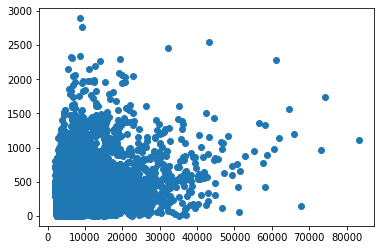

In [27]:
pyplot.scatter(data['Customer Lifetime Value (USD)'], data['Total Claim Amount (USD)'])
pyplot.show()

In [30]:
from scipy.stats import pearsonr
corr, Pval = pearsonr(data['Customer Lifetime Value (USD)'], data['Total Claim Amount (USD)'])
print('Pearsons correlation: %.3f' % corr)
print('Pvalue',Pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("Since P value is <0.05 so result is statistically significant and hence rejecting null hypothesis of correlation exists between both variables")
else:
  print('Result is statistically Insignificant hence we can not reject null hypothesis')

Pearsons correlation: 0.226
Pvalue 1.5501601809276793e-106
Result is statistically Insignificant hence we can not reject null hypothesis


# Non Parametric Significant Test
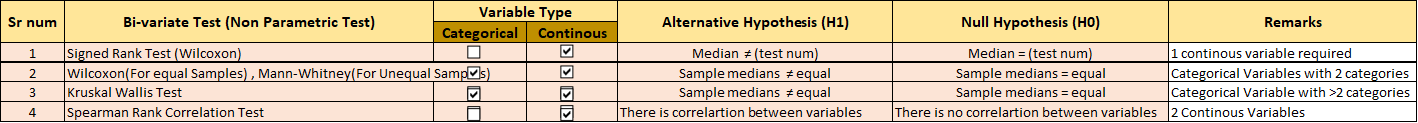

In [42]:
#Signed Rank Test
from scipy.stats import wilcoxon
from scipy.stats import kruskal
import scipy.stats as stats

In [95]:
stats, p_value = wilcoxon(data['Months Since Policy Inception'] - 50)
print("Pvalue", p_value)

Pvalue 5.7901141135645556e-11


In [88]:
from scipy.stats import mannwhitneyu
stat, p = stats.mannwhitneyu(data['Customer Lifetime Value (USD)'][data['Gender'] == 'M'], data['Customer Lifetime Value (USD)'][data['Gender'] == 'F'])
print('Pval',p)

Pval 0.24378756796050333


In [90]:
stat, p = stats.kruskal(data['Monthly Premium Auto (USD)'][data['Policy Type'] == 'Corporate Auto'], 
             data['Monthly Premium Auto (USD)'][data['Policy Type'] == 'Personal Auto'],
             data['Monthly Premium Auto (USD)'][data['Policy Type'] == 'Special Auto'])
print('Pval',p)

Pval 0.75809743997912


In [89]:
from scipy.stats import spearmanr
stat, p = stats.spearmanr(data['Customer Lifetime Value (USD)'], data['Total Claim Amount (USD)'])
print('Pval',p)

Pval 4.6532166978981714e-92
